# In the North, we trust!

**The European Social Survey (ESS)** is a biennial cross-national survey of attitudes and behaviour. Since its beginning in 2001, the study has been conducted 7 times. The results are published online.

In this brief study, we are interested in which what factors have seen the greatest changes in the ESS across the years. We observe that trust to political authorities is one of these. We examine trust to politicians and the European Parliament, and show that there has been a  decrease in trust particularly towards the EU and in Central and Southern Europe. However, Northern European respondents report notably higher levels of trust. We speculate if the decrease in trust towards authoroties is related to Generalized Social Trust towards other people but judging by visual inspection of the data, this does not seem to be the case.

This notebook will guide you through the analysis. Please run each cell so that the code will run and figures will be shown.

Note: please unzip the file data.zip to the same folder with this notebook. We have had to zip the data because of file size constraints of Github.

### Ingest

In [9]:
import pandas as pd
import numpy as np
import zipfile


filename = 'ESS1-7e01.zip'

#Read file contents in pandas Data Frame
zf = zipfile.ZipFile('data.zip') 
df = pd.read_csv(zf.open('ESS1-7e01.csv'), sep=',', low_memory=False)
#df = pd.read_csv(filename, sep=',', low_memory=False)




### Drop uninteresting variables to conserve memory

In [ ]:
#The data set contains some variables which are not particularly interesting for us. Let us drop some of them.
df = df.drop(columns=['edition', 'idno', 'name', 'cproddat', 'cedition', 'cname', 'cseqno'])

#Let's also drop weights for now
df = df.drop(columns=['dweight', 'pspwght', 'pweight'])


### Data encoding and missing values

Most of the questions in the survey are categorical or binary tickboxes but they are encoded as numbers.
We would like to treat nominal variables differently to ordinal variables.
However, it is difficult to recognize which variables are nominal and which ordinal based on the encoded values.

Many questions are Likert-like. Because the ESS survey is time series data, we can analyze trends based on Likert-like and binary values.

In [10]:
#Some question include additional missing value options also encoded as numbers. 
#These are encoded with numbers 6, 7, 8, 9, 55, 66, 77, 88, 99, 555, 666, etc.

#We well replace ESS missing data encodings with NaN. The below values don't appear naturally.
#However, we are still left with missing value encodings [6, 7, 6, 9].

df.replace(to_replace=[99, 88, 77, 66, 55, 999, 888, 777, 666, 555, 9999, 8888, 7777, 6666, 5555], value=np.nan, inplace=True)


In [11]:
#Replace missing data encodings with NaN in variables with less unique values

for col in list(df):
    if 6 not in df[col].unique() and 7 in df[col].unique() and 8 in df[col].unique() and 9 in df[col].unique():
        df[col].replace(to_replace=[7, 8, 9], value=np.nan, inplace=True)

for col in list(df):
    if 5 not in df[col].unique() and 6 in df[col].unique() and 7 in df[col].unique() and 8 in df[col].unique() and 9 in df[col].unique():
        df[col].replace(to_replace=[6, 7, 8, 9], value=np.nan, inplace=True)

### Drop values with insufficient response rate

We still have a lot of data. We probably don't need all of it. Let's drop variables which have more than 50% missing values.

In [12]:
df = df[df.columns[df.isnull().mean() < 0.5]]

### Aggregate variables to a more insightful level

We have a lot of data but nothing specific to look for.
Perhaps we will find something interesting if we look at which variables have seen the greatest absolute change since the beginning of ESS.

In [13]:
#First, let's see aggregate a mean for each variable per each ESS round and country.
df.groupby(['essround','cntry']).agg('mean').unstack().T

essround              1         2         3         4         5         6  \
        cntry                                                               
tvtot   BE     4.163061  4.392576  4.299221  4.306250  4.275822  4.117710   
        CH     3.208926  3.334736  3.207987  3.415292  3.192563  3.101274   
        DE     4.373886  4.339498  4.246655  4.216442  4.192867  3.992898   
        DK     4.425532  4.241426  4.158245  4.217310  4.358730  4.155340   
        ES     4.527504  4.221888  3.998400  4.015546  3.949549  3.917417   
        FI     3.901951  3.919347  3.905013  3.753531  3.784878  3.710514   
        FR     4.272788  4.425249  4.328463  4.299083  4.288528  4.485511   
        GB     5.057505  5.199472  4.957376  4.887755  4.967328  4.965442   
        HU     4.312352  4.166333  4.345191  4.436528  4.240231  4.442843   
        IE     4.672277  4.694335  4.327384  4.405896  4.751845  4.839619   
        NL     4.634053  4.515700  4.339333  4.273957  4.527382  4.398374   
        NO     3.965128  3.947727  3.760571  3.845061  3.948966  3.874384   
        PL     4.165955  4.036778  4.071096  4.109733  3.935817  3.910970   
        PT     4.150232  4.100832  4.214738  4.404580  4.586142  4.901632   
        SE     3.803902  3.752053  3.695223  3.639344  3.720107  3.657638   
        SI     3.409750  3.426287  3.418652  3.553307  3.577334  3.515513   
tvpol   BE     1.964130  1.777008  1.909766  1.876101  1.838865  1.829255   
        CH     1.742781  1.658438  1.515973  1.462775  1.475917  1.532751   
        DE     1.882662  1.799857  1.755508  1.832892  1.757388  1.830382   
        DK     2.359703  2.324157  2.286869  2.406940  2.344695  2.295072   
        ES     2.008945  1.779285  1.811002  1.738559  1.695581  2.037611   
        FI     2.076804  2.076570  2.143249  2.053924  2.117479  2.076923   
        FR     2.172148  2.107246  1.972832  2.027905  2.094488  2.305776   
        GB     2.202790  2.178705  2.041667  2.110819  1.882378  1.935630   
        HU     1.733990  1.629245  1.805256  1.753633  1.596269  1.616658   
        IE     2.315396  1.975752  2.008111  2.000000  2.076707  1.982772   
        NL     2.334920  2.195016  2.066304  2.118566  2.243106  2.150195   
        NO     2.426303  2.389049  2.198718  2.144452  2.182724  2.171011   
        PL     2.015324  1.891041  1.955623  1.953638  1.861965  1.907479   
        PT     2.294872  1.983598  2.322299  2.093805  2.053989  2.327954   
...                 ...       ...       ...       ...       ...       ...   
imptrad DE     3.057536  2.987456  3.011317  2.904398  2.839657  2.841447   
        DK     2.770916  2.753867  2.843189  2.762112  2.755711  2.864242   
        ES     2.634471  2.757667  2.660981  2.607143  2.719363  2.740603   
        FI     3.061832  3.112275  3.823840  3.824146  3.752396  3.072371   
        FR     3.308597  3.563677  3.351460  3.409069  3.290509  3.331301   
        GB     3.072256  2.958882  2.946533  2.891156  2.907102  2.793526   
        HU     2.683384  2.683578  2.646245  2.920984  2.770660  2.555114   
        IE     2.517421  2.357143  3.091111  2.494898  3.142081  2.658676   
        NL     2.895516  2.866029  2.926945  3.000000  2.922362  2.915989   
        NO     2.977497  3.096106  3.734857  3.601679  2.930879  2.954433   
        PL     2.217062  2.189977  2.222545  2.344657  2.274700  2.137513   
        PT     2.880874  2.718324  2.736274  2.883819  2.824651  2.861925   
        SE     3.194851  3.209412  4.155682  4.059563  3.284569  3.035192   
        SI     2.633244  2.817614  2.680217  2.715397  2.533143  2.459825   
impfun  BE     2.641917  2.720472  2.561735  2.680114  2.565728  2.613697   
        CH     3.030882  3.082672  3.126940  3.112699  2.982736  2.859344   
        DE     3.223085  3.231359  3.235597  3.262087  3.164302  3.081474   
        DK     2.792829  2.865501  2.888372  2.792547  2.639594  2.626667   
        ES     3.179873  3.355382  3.159382  3.080357  3.021751  3.061408

In [14]:
#Since the question are with different scales, we'll hopefully get a more accurate idea by taking the percentage of change from one year to another.

df.groupby(['essround','cntry']).agg('mean').unstack().pct_change()

tvtot                                                    \
cntry           BE        CH        DE        DK        ES        FI   
essround                                                               
1              NaN       NaN       NaN       NaN       NaN       NaN   
2         0.055131  0.039206 -0.007862 -0.041601 -0.067502  0.004458   
3        -0.021253 -0.038009 -0.021395 -0.019612 -0.052936 -0.003657   
4         0.001635  0.064621 -0.007115  0.014204  0.004288 -0.038792   
5        -0.007066 -0.065215 -0.005591  0.033533 -0.016435  0.008351   
6        -0.036978 -0.028594 -0.047693 -0.046663 -0.008136 -0.019647   
7        -0.005098 -0.003189 -0.024467 -0.033212  0.041258  0.006219   

                                                    ...       impfun  \
cntry           FR        GB        HU        IE    ...           FR   
essround                                            ...                
1              NaN       NaN       NaN       NaN    ...          NaN   
2         0.035682  0.028071 -0.033861  0.004721    ...     0.103907   
3        -0.021871 -0.046562  0.042929 -0.078169    ...    -0.103771   
4        -0.006788 -0.014044  0.021020  0.018143    ...    -0.000144   
5        -0.002455  0.016280 -0.044246  0.078520    ...    -0.001618   
6         0.045932 -0.000380  0.047783  0.018472    ...    -0.015362   
7        -0.061721 -0.015190  0.021359 -0.054946    ...     0.039063   

                                                                      \
cntry           GB        HU        IE        NL        NO        PL   
essround                                                               
1              NaN       NaN       NaN       NaN       NaN       NaN   
2         0.003634 -0.026501 -0.007557  0.007249  0.044646 -0.002296   
3        -0.022642  0.057572  0.168849 -0.032495  0.147565 -0.016445   
4         0.005053  0.162012 -0.175920  0.055534 -0.022952  0.034415   
5        -0.006878 -0.098959  0.145358 -0.052693 -0.173188  0.005836   
6        -0.037682 -0.051143 -0.070719 -0.028403 -0.051118 -0.008953   
7         0.040914  0.157311 -0.052916  0.156685  0.040034  0.005829   

                                        
cntry           PT        SE        SI  
essround                                
1              NaN       NaN       NaN  
2        -0.005119 -0.030694  0.042404  
3         0.055594  0.316768 -0.073456  
4         0.041053 -0.030869  0.046919  
5        -0.077403 -0.243352 -0.001106  
6         0.032494 -0.081971 -0.005184  
7        -0.066565  0.034092  0.031166  

[7 rows x 3104 columns]

In [15]:
#Let's only look at the change between the first and the last ESS round.

cum_changes = df.groupby(['essround','cntry']).agg('mean').unstack().pct_change(6)[6:].T

### European aggregation

To look at Europe as a whole, let's again aggregate these averages to European level.

In [16]:
#We take the mean for each variable on level 0, which is the country variable in this DataFrame.
sorted_changes = cum_changes.mean(level=0).sort_values(by=[7])

#Fill infinite values with NaN.
sorted_changes = sorted_changes.replace([np.inf, -np.inf], np.nan).dropna()

#Let's change the name to something more appropriate.
sorted_changes.columns = ['pct_change']

#Calculate absolute change and make it a new column, and sort based on that.
sorted_changes['abs_pct_change'] = sorted_changes['pct_change'].abs()
sorted_changes.sort_values(by='abs_pct_change', ascending=False)

#Retrieve the 20 variables where we see the greatest change across Europe
top20 = sorted_changes.nlargest(20, 'abs_pct_change')
top20 = top20[['abs_pct_change', 'pct_change']]

#Make the table prettier.
top20.style.bar(subset=['pct_change', 'abs_pct_change'], align='mid', color=['#d65f5f', '#5fba7d'])

,abs_pct_change,pct_change
dscrna,0.868949,-0.868949
dscrntn,0.790075,0.790075
dscrgnd,0.647734,0.647734
uempla,0.562987,0.562987
dscrrlg,0.512438,0.512438
dscrrce,0.439869,0.439869
hswrk,0.287756,-0.287756
hswrkp,0.27862,-0.27862
rtrdp,0.276662,0.276662
uemplap,0.271001,0.271001


### Codebook exempts for the most changed variables

Let's examine what do the most changed values mean by looking at the ESS codebook.

**dscrna**: "On what grounds is your group discriminated against?", multiple choice tickbox question where this variable is binary indicator of whether the respondent did not tick any other boxes. Because there is a negative change, the respondents are thus more able to tick one other box stating a factor which has lead them to experience discrimination. Therefore, experiences of discrimation based on a group characteristic has increased over the years.

**dscrntn**: "On what grounds is your group discriminated against? - Nationality". Binary tickbox. Experiences of discrimination based on nationality have increased.

**dscrgnd**: "On what grounds is your group discriminated against? - Gender". Binary tickbox. Experiences of discrimination based on gender have increased.

**uempla**: "Using this card, which of these descriptions applies to what you have been doing for the last 7 days? - Unemployed and actively looking for a job." Binary tickbox. Unemployment and job-seeking activities have increased.

**dscrrlg**: "On what grounds is your group discriminated against? - Religion". Binary tickbox. Experiences of discrimination based on religion have increased.

**dscrrce**: "On what grounds is your group discriminated against? - Race". Binary tickbox. Experiences of discrimination based on race have increased.

**hswrk**: "Using this card, which of these descriptions applies to what you have been doing for the last 7 days? - 
Doing housework, looking after children or other persons." Binary tickbox. Housework activities have decreased.

**hswrkp**: "Which of the descriptions on this card applies to what he/she has been doing for the last 7 days? - 
Doing housework, looking after children or other persons" Binary tickbox. Partner's ousework activities have decreased.

**rtrdp**: "Which of the descriptions on this card applies to what he/she has been doing for the last 7 days? - 
Retired" Binary tickbox. More partners have been retired.

**uemplap**: "Using this card, which of these descriptions applies to what he/she has been doing for the last 7 days? - Unemployed and actively looking for a job." Binary tickbox. Partner's unemployment and job-seeking activities have increased.

**rtrdp**: "Which of the descriptions on this card applies to what you have been doing for the last 7 days? - 
Retired" Binary tickbox. More respondents have been retired.

**dscrage**: "On what grounds is your group discriminated against? - Age". Binary tickbox. Experiences of discrimination based on age have increased.

**edulvla**: "What is the highest level of education you have achieved?" Ordinal scale. Respondents' level of education has increased.

**freehms**: "Using this card, please say to what extent you agree or disagree with each of the following statements - 
Gay men and lesbians should be free to live their own life as they wish" Likert-like scale. Respondents agree with the statement more.

**uemplip**: "Which of the descriptions on this card applies to what he/she has been doing for the last 7 days? - 
Unemployed, wanting a job but not actively looking for a job" Binary tickbox. Number of Partners who are unemployed, wanting a job but not seeking one has increased.

**trstplt**: "Using this card, please tell me on a score of 0-10 how much you personally trust each of the institutions I read out. 0 means you do not trust an institution at all, and 10 means you have complete trust. Firstly...
... politicians?" Likert-like scale. Trust to politicians decreased.

**dsbld**: "Using this card, which of these descriptions applies to what you have been doing for the last 7 days?
Permanently sick or disabled" Binary tickbox. Number of disabled increased.

**trstep**: "Using this card, please tell me on a score of 0-10 how much you personally trust each of the institutions I read out. 0 means you do not trust an institution at all, and 10 means you have complete trust. Firstly...
... the European Parliament?" Likert-like scale. Trust to European Parliament decreased.

**stfhlth**: "Still using this card, please say what you think overall about the state of health services in [country] nowadays?"
Likert-like scale. Perception of health services quality has increased.

**iphlppl**: "Now I will briefly describe some people. Please listen to each description and tell me how much each person is or is not like you. Use this card for your answer.
It's very important to her/him to help the people around her/him. She/he wants to care for their well-being." Likert-like scale. Self-identification towards helpful people decreased.

In [17]:
#A lot of stuff, a lot of explaining!

#We would like to visualize some of these changes.

#Since we're going to draw these graphs a lot, let's make a function out of it.

import matplotlib.pyplot as plt

def draw_change(var, group, stat):
    fig, ax = plt.subplots(figsize=(15,7))

    df.groupby(['essround',group])[var].agg(stat).unstack().plot(ax=ax)
    df.groupby(['essround',group])[var].agg(stat).unstack().T.agg('mean').plot(ax=ax, style='--', colormap='gray', title=var)
    df.groupby(['essround',group])[var].agg(stat).unstack().T.agg('std').plot(ax=ax, style='--', colormap='gray', title=var)
    plt.show()

A little caveat with the list of most changed variables is the emphasis that the above method puts on binary variables. Because we are looking at the changes as percentages, change from the binary scale 1 to 0 is rather drastic. Ideally, we'd eliminate binary variables from this examination. Hence we are focusing on Likert-like variables which where the above examination made more sense.

### Finding the insight

Now that we have bunch of digestible data and a function that let's us explore them, we need to start exploring.
Even if the task is to find "one insight", we cannot find an interesting insight without stumbling around multiple other possibilities for insights.

First, we want to test something that is common knowledge. Education levels have risen across the world so we should see that in the ESS data. Further, we should see that Northern and Western European have higher levels of education compared to Central and South Europe.

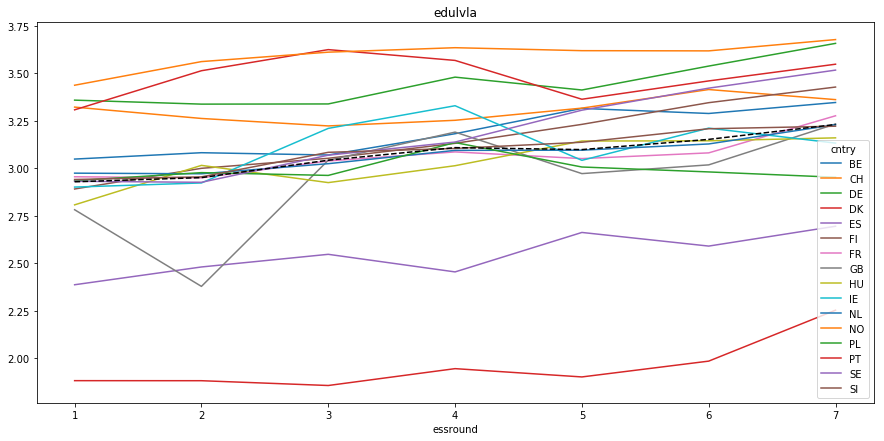

In [18]:
#There were a lot of interesting observations! Let's look at some on country-level.

#First, education:
draw_change('edulvla', 'cntry', 'mean')

In [12]:
#So many countries makes the graph a bit of a mess. Let's group some of them together.
#We are assuming, a priori, that some countries are similar.

#Alternatively, we could do e.g. a cluster analysis and see if our perception of similar countries is in accordance with the data.
#But let's not question the status quo right now and let's go with traditional geography-inspired distinctions:

def labelRegion(cntry):
    if cntry in ['DK', 'FI', 'SE', 'NO']:
        return 'north'
    if cntry in ['HU', 'PL', 'SI']:
        return 'central'
    if cntry in ['PT', 'ES']:
        return 'south'
    if cntry in ['DE', 'CH', 'FR', 'BE', 'NL']:
        return 'west'
    if cntry in ['GB', 'IE']:
        return 'uki'

df['region'] = df.apply (lambda row: labelRegion(row['cntry']),axis=1)

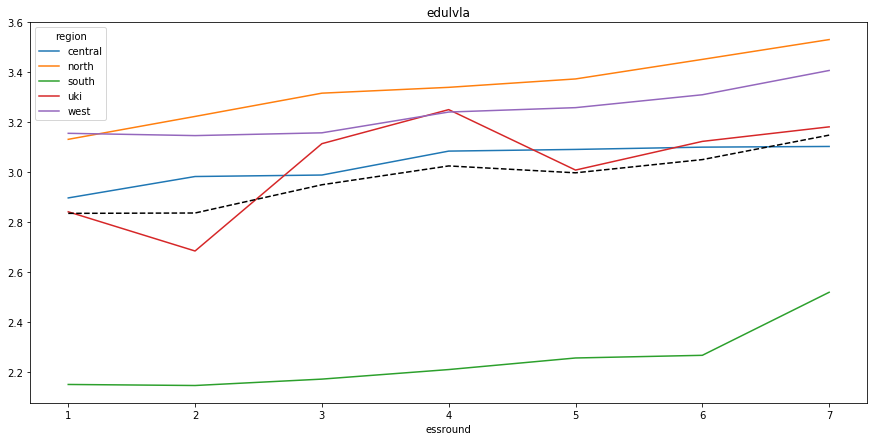

In [13]:
#Let's look at education again - but regionally

draw_change('edulvla', 'region', 'mean')

We see what we know; Northern Europe is highly educated whereas South is not as much. However, we see that education levels have been increasing across the board.

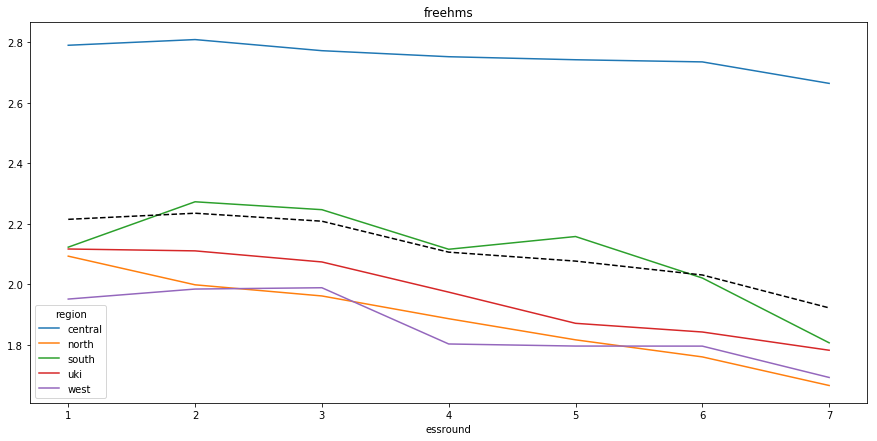

In [14]:
#Let's look at values; acceptance of homosexuality

draw_change('freehms', 'region', 'mean')

We notice that people disagree less with the statement that "Gays and lesbians should be free to live their life as they wish. However, central European nations are still more opposed to this compared to other European geographies.

## End the truisms: Insights into Trust

Trust is another interesting variable. From listening to a plenty of behavioural economics podcasts, I have been lead to believe countries with higher levels of Social Trust have higher GDPs. Unfortunately, we don't have GDP information in this data - but the geographical grouping also reflects the wealth of those nations.

After some exploration, we choose Trust as to focal point for our insight. Focusing on this gives as plenty of room where we would go with further analyses.

First, let's look how much people can trust politicians and the European Parliament.

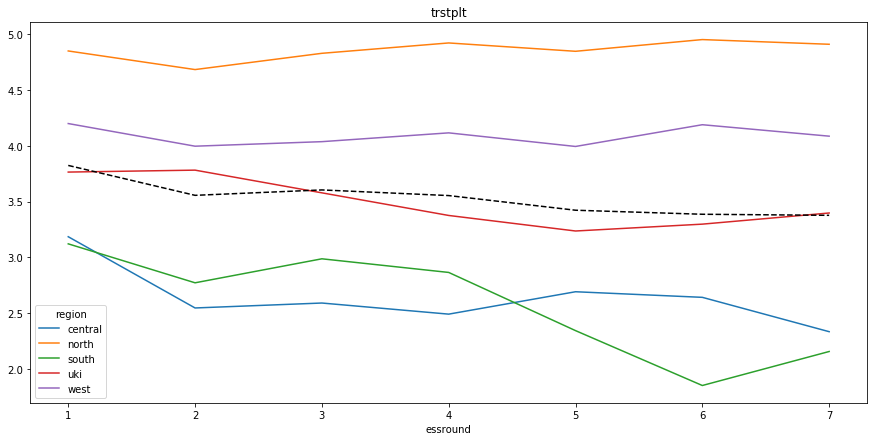

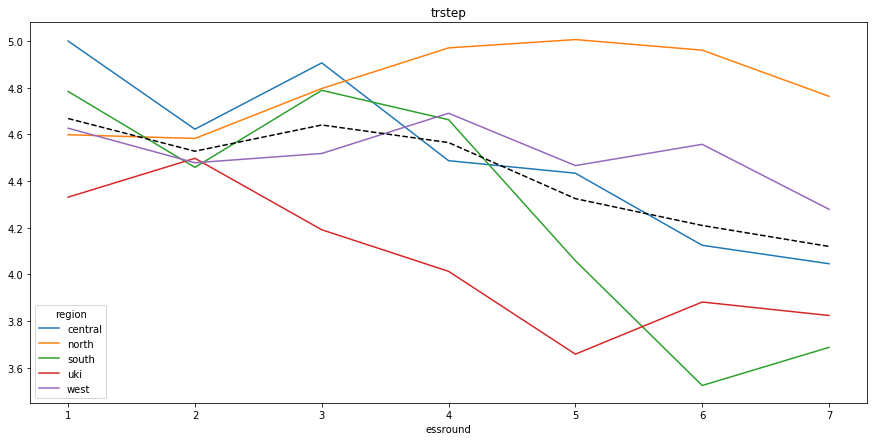

In [16]:
#Trust is interesting, let's look how much people can trust politicians and the European Parliament

draw_change('trstplt', 'region', 'mean')
draw_change('trstep', 'region', 'mean')


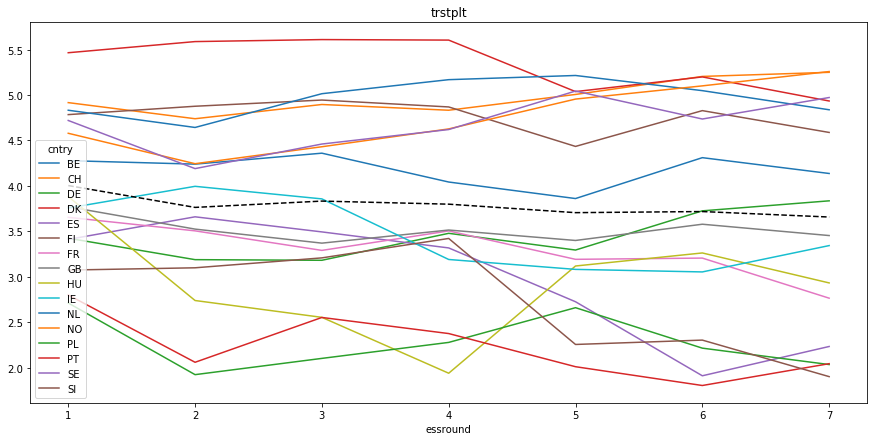

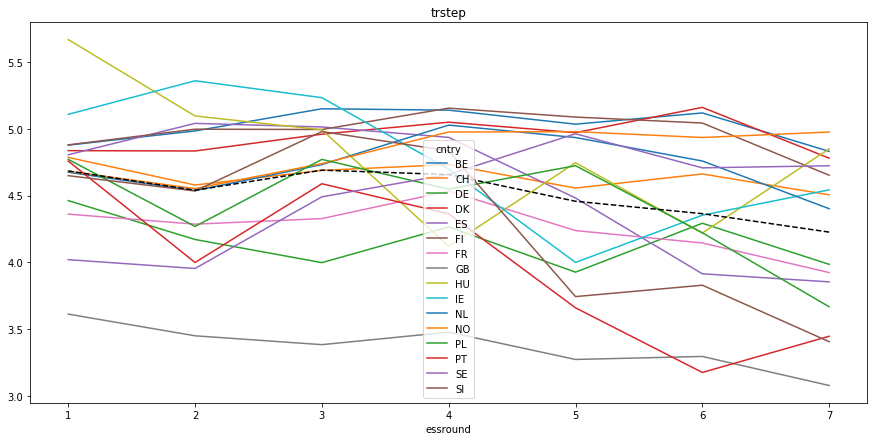

In [17]:
draw_change('trstplt', 'cntry', 'mean')
draw_change('trstep', 'cntry', 'mean')

Some observation: The British have approximately mean levels of trust to politicians but the lowest trust to the EP. The trust of the Portuguese towards EP has decline drastically since mid-ESS history (around 2010, after the Great Recession hit). Scandinavians continue to trust everyone.

We also see that confidence intervals or drawing sigmas around the mean would help us understand whether there actually has been a difference throughout time. We must remember that *n* of samples is quite high so we might assume even from this that even smallish changes in the mean level indicate a true change.

## On the Theory of Trust

We saw a decline in trust towards political authorities. If we speculate a bit further, could increasing lack of trust be the reason for the turmoil in Europe?

Some researches (Beilmann, 2017; Breen, 2016) have argued for Generalized Social Trust Index which is measured by three questions in ESS:
* Trust: ‘Would you say that most people can be trusted, or that you can’t be too careful in dealing with people?’ (0 = ‘You can't be too careful’ – 10 = ‘Most people can be trusted’);
* Fairness: ‘Do you think that most people would try to take advantage of you if they got the chance, or would they try to be fair?’ (0 = ‘Most people would try to take advantage of me’ – 10 = ‘Most people would try to be fair’);
* Helpfulness: ‘Would you say that most of the time people try to be helpful or that they are mostly looking out for themselves?’ (0 = ‘People mostly look out for themselves’ – 10 = ‘People mostly try to be helpful’).

Do we observe a decline in Generalized Social Trust Index, or are the European trust issues specifically related to political authority? Can the rising tide of extremist idealogies, increaing inequality, marginalizing rethoric and the echo chambers of social media be manifestations of diminished Social Trust? Let us see.

References:
*Beilmann, M. (2017). Social Capital and Individualism–Collectivism at the Individual Level (Doctoral dissertation).
Breen, M. J., & Healy, A. E. (2016). Changing Values, Attitudes and Behaviours in Ireland: An Analysis of European Social Survey Data in Ireland, 2002-2012. Cambridge Scholars Publishing.*

In [18]:
#Let's calculate social trust, as defined in the literature

df['socialTrust'] = ((df.ppltrst + df.pplfair + df.pplhlp) / 3)

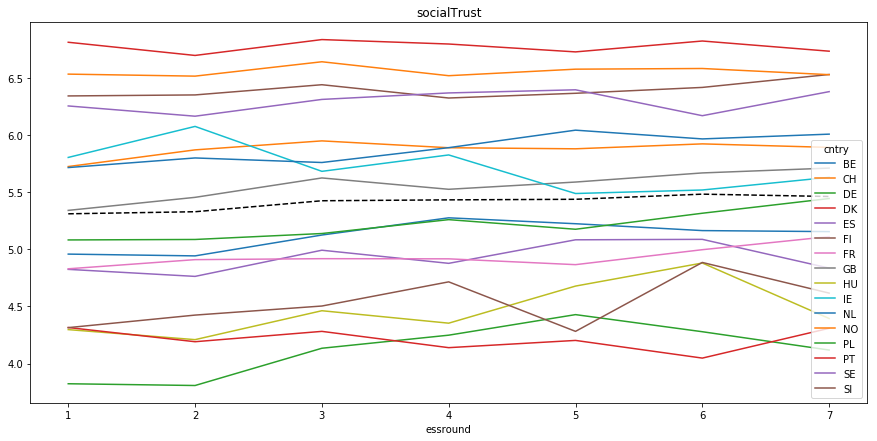

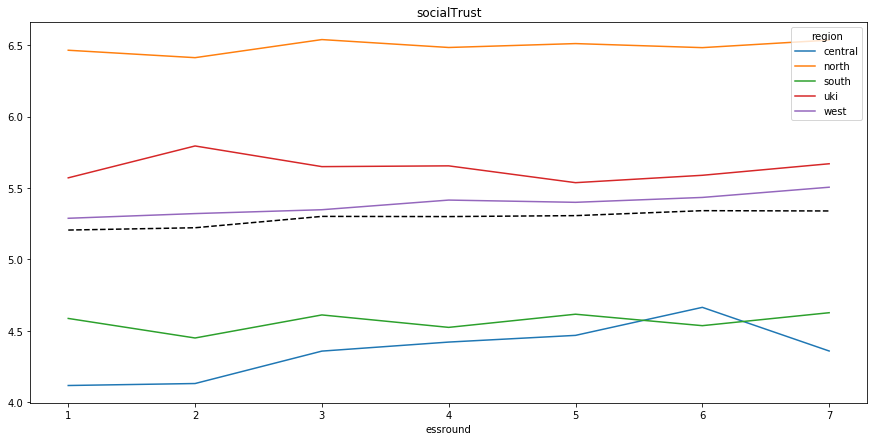

In [19]:
draw_change('socialTrust', 'cntry', 'mean')
draw_change('socialTrust', 'region', 'mean')

In [ ]:
Alright, we don't really see a real change in social trust over the years. Maybe slight upward trend.
Maybe the decline in social cohesion is actually exhibited through increased deviation in how much people can trust others?

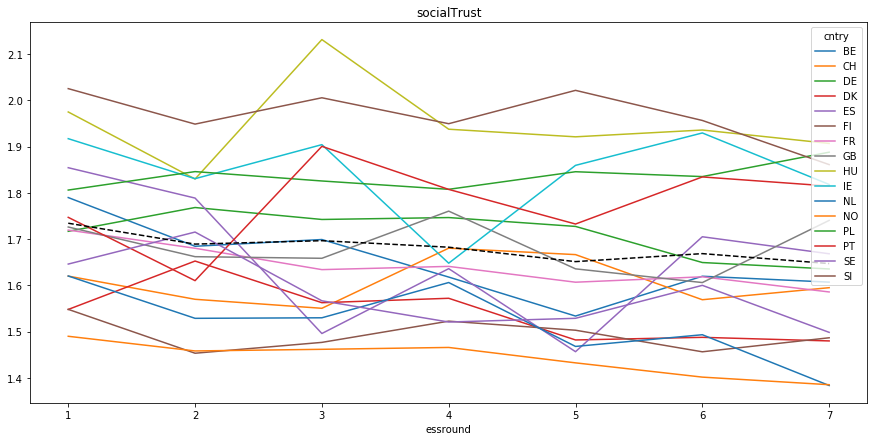

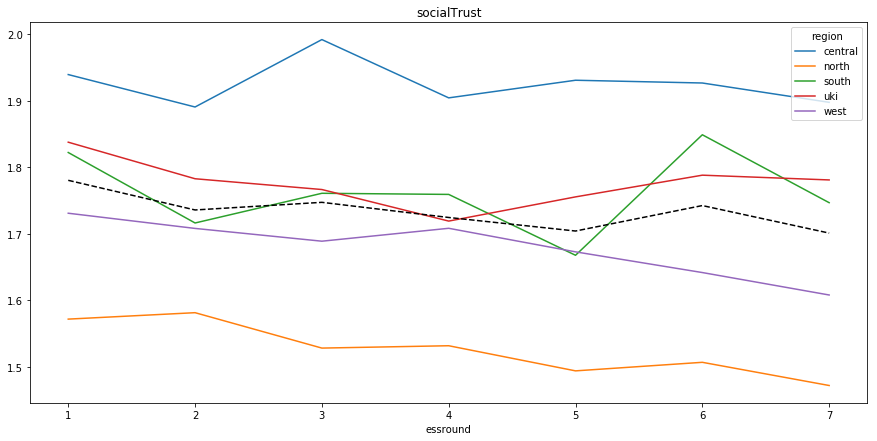

In [20]:
draw_change('socialTrust', 'cntry', 'std')
draw_change('socialTrust', 'region', 'std')

It would seem that there is a slight decline in the dispersion of social trust, i.e. people are having more similar levels of trust. Central Europe has the greatest variability in social trust, possibly because there is greater inequality present.
The North, on the other hand, continues to be a place where everyone trust everyone.

## Conclusion

We showed how the European Social Survey can tells us what changes in attitudes are happening across Europe as years are passing. In particular, we examined trust which was among the most changed variables within the ESS. We saw a particular decline in trust towards the European Parliament, especially in the UK/Ireland and Southern Europe. However, we did not see a decline in Generalized Trust Index, suggesting that the increased distrust is directed mainly towards political authority.